<a href="https://colab.research.google.com/github/luisArthurRodriguesDaSilva/estudo-data-science-eleicoes/blob/master/apura%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import requests
import pprint
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
BRAZIL_UFs = ["AC","AL","AM","AP","BA","CE","DF","ES","GO","MA","MT","MS","MG","PA","PB","PR","PE","PI","RJ","RN","RO","RS","RR","SC","SE","SP","TO"]
brasil_ufs = ['ac','al','am','ap','ba','ce','df','es','go','ma','mt','ms','mg','pa','pb','pr','pe','pi','rj','rn','ro','rs','rr','sc','se','sp','to']

In [3]:
def getDeputadoEstadualUrl(uf):
  return f'https://resultados.tse.jus.br/oficial/ele2022/546/dados-simplificados/{uf}/{uf}-c0007-e000546-r.json'

def getPresidentUrl(uf):
  return f'https://resultados.tse.jus.br/oficial/ele2022/544/dados-simplificados/{uf}/{uf}-c0001-e000544-r.json'

def getGovernadorUrl(uf):
  return f'https://resultados.tse.jus.br/oficial/ele2022/546/dados-simplificados/{uf}/{uf}-c0003-e000546-r.json'

def getDeputadoFederalUrl(uf):
  return f'https://resultados.tse.jus.br/oficial/ele2022/546/dados-simplificados/{uf}/{uf}-c0006-e000546-r.json'

def getSenadorUrl(uf):
  return f'https://resultados.tse.jus.br/oficial/ele2022/546/dados-simplificados/{uf}/{uf}-c0005-e000546-r.json'

gets= [getPresidentUrl, getSenadorUrl, getDeputadoFederalUrl, getDeputadoEstadualUrl, getGovernadorUrl]
categoryKeys= ['Presidente', 'Senador', 'DeputadoFederal', 'DeputadoEstadual', 'Governador']

In [11]:
def trabalhoDoJuan(url,uf): #taked on 
  re=requests.get(url).json()
  candidatos = re['cand'][:10]

  df=pd.DataFrame(candidatos)
  df=df[['nm','n','dvt','vap','pvap']]
  df.rename(columns={'nm':'Nome do Candidato',
                  'n':'Numero do Candidato',
                  'dvt':'Validade',
                  'vap':'Votos',
                  'pvap':'(%) Votos'}, inplace=True)

  df['Horario Atualização']=re['hg']
  df['(%) Votos']=df['(%) Votos'].str.replace(',','.')
  df['(%) Votos']=df['(%) Votos'].astype(float)
  df['Votos']=df['Votos'].astype(int)
  df['Nome do Candidato']=df['Nome do Candidato'].str.replace('D&apos;',"D'")
  df=df.sort_values(by='Votos', ascending=False)

  fig, axs = plt.subplots(ncols=1, figsize=(13,6))

  ax1 = sns.barplot(
      x="Nome do Candidato",
      y='(%) Votos',
      data=df[:10],
      palette="ch:.25",
      ax=axs)

  ax1.set(xlabel="Candidatos(as)",
          ylabel="(%) Votos",
          title=f"Apuração de resultados Eleições 2022 {uf} - Presidente - (5 mais Votados)",
          ylim=(0,70))


  # Adicionando rotulo com valores no gráfico ax1:
  for p in ax1.patches:
              ax1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', fontsize=13, color='black', xytext=(2, 5),
                  textcoords='offset points')

  plt.show()

  print (f'Sessões Totais em {uf}: {re["s"]}')
  print (f'Sessões Apuradas em {uf}: {re["st"]}')
  pct=int(re['st'])/int(re['s'])*100
  print (f'Percentual de sessões apuradas em {uf}: {round(pct,4)}%')

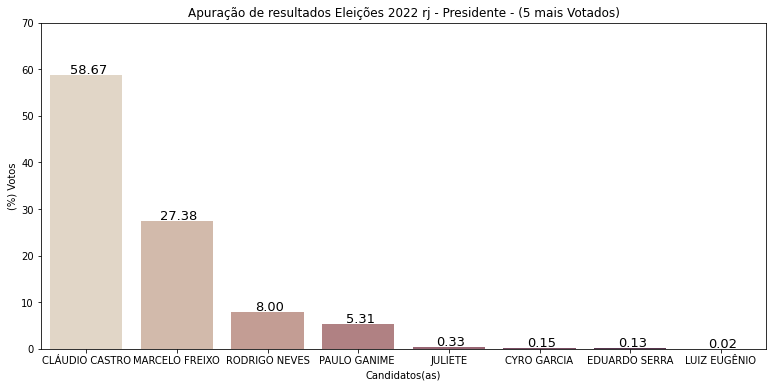

Sessões Totais em rj: 34068
Sessões Apuradas em rj: 34068
Percentual de sessões apuradas em rj: 100.0%


In [12]:
trabalhoDoJuan(getGovernadorUrl('rj'),'rj')

In [5]:
def takeData(url):
  re=requests.get(url).json()
  candidatos = re['cand']

  df=pd.DataFrame(candidatos)
  df=df[['nm','n','dvt','vap','pvap']]
  df.rename(columns={'nm':'Nome do Candidato',
                  'n':'Numero do Candidato',
                  'dvt':'Validade',
                  'vap':'Votos',
                  'pvap':'(%) Votos'}, inplace=True)
  
  df['(%) Votos']=df['(%) Votos'].str.replace(',','.')
  df['(%) Votos']=df['(%) Votos'].astype(float)
  df['Votos']=df['Votos'].astype(int)
  df['Nome do Candidato']=df['Nome do Candidato'].str.replace('D&apos;',"D'")
  df=df.sort_values(by='Votos', ascending=False)
  return(df)

In [6]:
def getAllDataByUf(uf):
  info = {}
  for index, category in enumerate(categoryKeys):
    try:
      info[category] = takeData(gets[index](uf))
    except:
      if uf == 'df':
        info[category] = 'df não tem prefeito'
      else:
        info[category] = 'this is brasil'
  return info

In [7]:
electionsData = {}
electionsData['br'] = getAllDataByUf('br')
for i, uf in  enumerate(brasil_ufs):
  electionsData[uf] = getAllDataByUf(uf)
  print(uf)

ac
al
am
ap
ba
ce
df
es
go
ma
mt
ms
mg
pa
pb
pr
pe
pi
rj
rn
ro
rs
rr
sc
se
sp
to


In [9]:
electionsData['ce']['Presidente']

,Nome do Candidato,Numero do Candidato,Validade,Votos,(%) Votos
0,LULA,13,Válido,3578355,65.91
5,JAIR BOLSONARO,22,Válido,1377827,25.38
10,CIRO GOMES,12,Válido,369222,6.80
2,SIMONE TEBET,15,Válido,66214,1.22
8,SORAYA THRONICKE,44,Válido,24497,0.45
7,FELIPE D'AVILA,30,Válido,7030,0.13
1,PADRE KELMON,14,Válido,2278,0.04
4,SOFIA MANZANO,21,Válido,1579,0.03
9,LÉO PÉRICLES,80,Válido,1129,0.02
3,VERA,16,Válido,717,0.01
